In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/german_credit_data.csv')
data.drop(data.columns[0], axis=1, inplace=True)
original = data.copy()
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
def EDA(data):
  print("*"*20,'Phase 1','*'*20)
  print('-'*20,'Data information'.center(5),'-'*20)
  data.info()
  print("\n")
  print('-'*20,'Data Shape'.center(5),'-'*20)
  print("Number of Rows: ",data.shape[0])
  print("Number of Columns: ",data.shape[1])
  print("\n")
  print('-'*20,'Null values in Data'.center(5),'-'*20)
  print(data.isnull().sum())
  print("\n")
  print('-'*20,'Summary of Data'.center(5),'-'*20)
  print(data.describe())
  print("\n")
  print('-'*20,'Unique Values in Data'.center(5),'-'*20)

  cols = []
  for i in data.columns:
      if data[i].dtype == 'object':
          cols.append(i)

  for c in cols:
    print("{} has {} unique values which are: {}".format(c,len(data[c].unique()),data[c].unique()))
    print('\n')

  print("*"*20,'Phase 2','*'*20)

  plt.subplot(1,5,1)
  sns.boxplot(data = pd.DataFrame(data['Age']),color='red').set_title('Age')
  plt.subplot(1,5,3)
  sns.boxplot(data = pd.DataFrame(data['Credit amount']),color='green').set_title('Credit_Amount')
  plt.subplot(1,5,5)
  sns.boxplot(data = pd.DataFrame(data['Duration']),color='purple').set_title('Duration')
  plt.show()

  s = sns.heatmap(data.isnull())
  s.set(xlabel='Columns', ylabel='Null Values', title = 'Heatmap of null values in the data')

  data.replace('NA', pd.NA, inplace=True)
  data['Saving accounts'].fillna('unknown', inplace=True)
  data['Checking account'].fillna('unknown', inplace=True)
  print(data.isnull().sum())

  bar_colors = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'pink', 'cyan']  # Add more colors as needed
  for c in cols:
      counts = data[c].value_counts()
      fig = go.Figure(data=go.Bar(
          x=counts.index,
          y=counts.values,
          marker=dict(color=bar_colors)
      ))
      fig.update_layout(
          title=f"Count Plot - {c}",
          xaxis_title="Categories",
          yaxis_title="Count",
          showlegend=False,
          template="plotly_white"
      )
      fig.show()
  counts = data['Job'].value_counts()
  fig = go.Figure(data=go.Bar(
          x=counts.index,
          y=counts.values,
          marker=dict(color=bar_colors)
  ))
  fig.update_layout(
          title=f"Count Plot - Jobs",
          xaxis_title="Categories",
          yaxis_title="Count",
          showlegend=False,
          template="plotly_white"
  )
  fig.show()

  correlation_matrix = data.corr()
  sns.heatmap(correlation_matrix)
  plt.show()

  for c in cols:
    counts = data[c].value_counts()

    fig = go.Figure(data=go.Pie(labels=counts.index, values=counts.values, hole=0.3))

    fig.update_layout(
        title=f'Distribution of {c}',
        template="plotly_white"
    )
    fig.show()

  plt.figure(figsize=(8, 6))
  sns.boxplot(data=data, x='Job', y='Credit amount')
  plt.xlabel('Job')
  plt.ylabel('Credit amount')
  plt.title('Boxplot of Credit amount by Job')
  plt.show()

  average_credit_by_housing = data.groupby('Housing')['Credit amount'].mean()
  average_credit_by_housing.plot(kind='bar')
  plt.xlabel('Housing')
  plt.ylabel('Average Credit amount')
  plt.title('Average Credit amount by Housing')
  plt.show()

  plt.figure(figsize=(12, 6))
  sns.countplot(data=data, x='Purpose', hue='Risk')
  plt.xlabel('Purpose')
  plt.ylabel('Count')
  plt.title('Count of Purpose by Risk')
  plt.show()

  sns.pairplot(data=data, vars=['Age', 'Credit amount', 'Duration'])
  plt.show()

  plt.figure(figsize=(8, 6))
  sns.countplot(data=data, x='Purpose')
  plt.xlabel('Purpose')
  plt.ylabel('Count')
  plt.title('Count of Purpose')
  plt.xticks(rotation=45)
  plt.show()

  cross_table = pd.crosstab(data['Risk'], data['Housing'])
  cross_table.plot(kind='bar', stacked=True)
  plt.xlabel('Risk')
  plt.ylabel('Count')
  plt.title('Distribution of Risk by Housing')
  plt.xticks(rotation=0)
  plt.show()

******************** Phase 1 ********************
-------------------- Data information --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


-------------------- Data Shape --------------------
Number of Rows:  1000
Number of Columns:  10


-------------------- Null values in Data --------------------
Age               

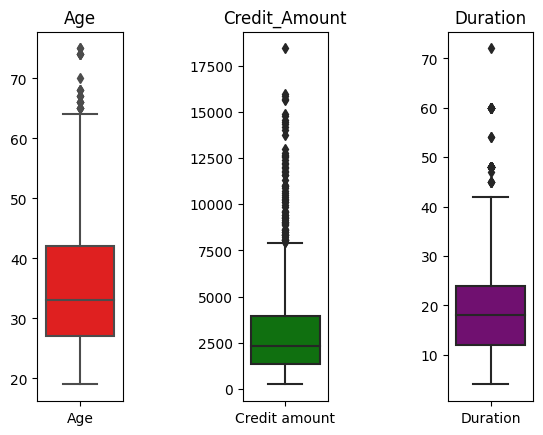

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64


<ipython-input-4-b850000f1f9a>:76: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



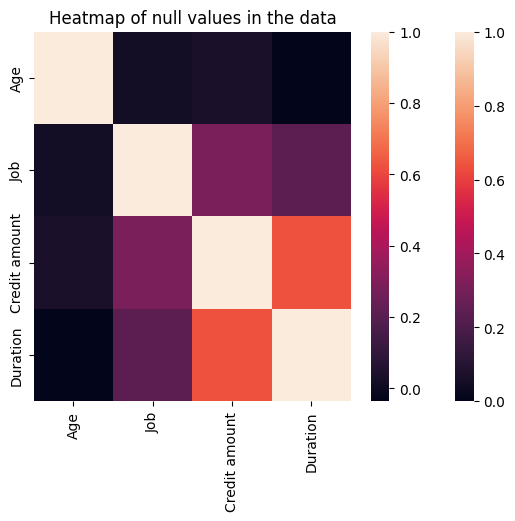

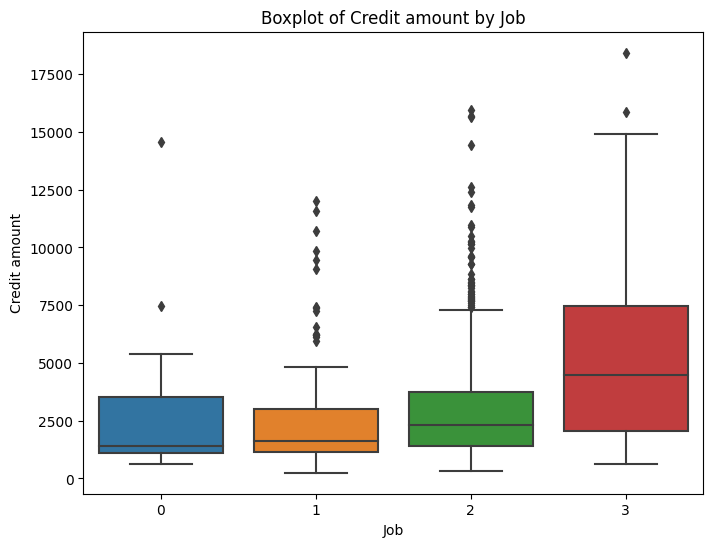

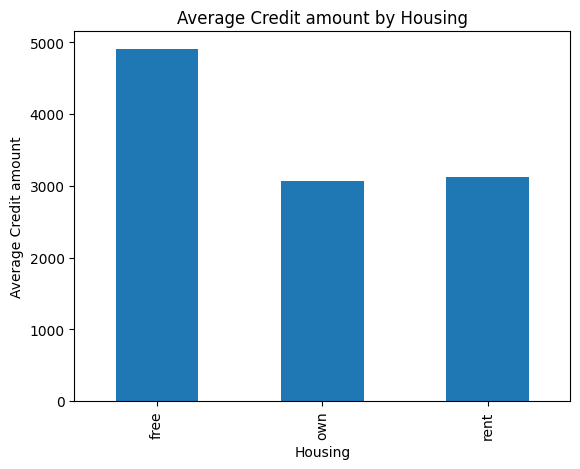

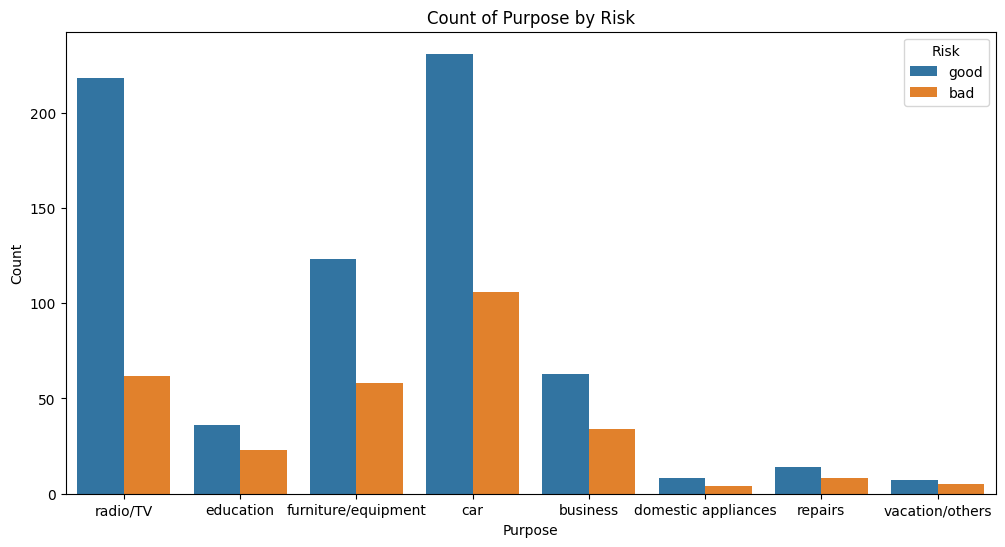

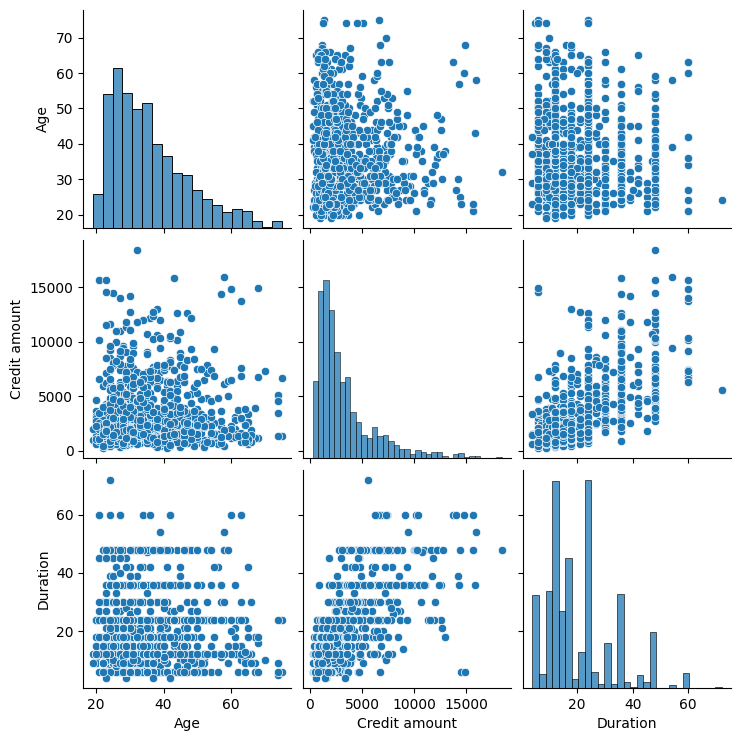

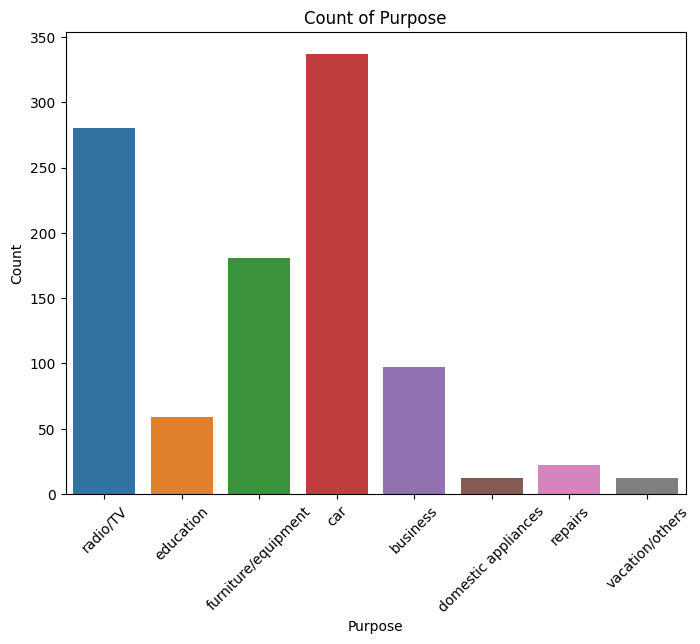

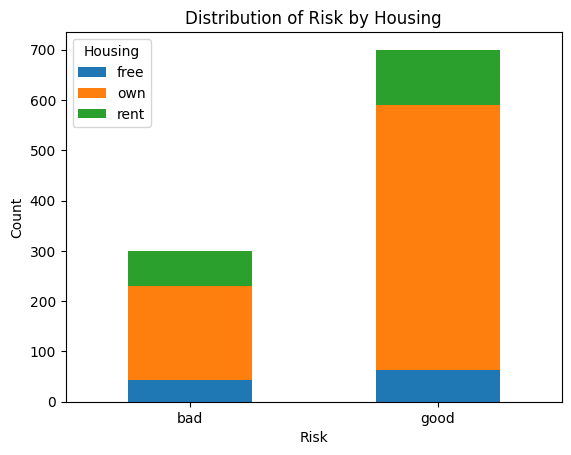

In [ ]:
EDA(data)

******************** Phase 1 ********************
-------------------- Data information --------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               700 non-null    int64 
 1   Sex               700 non-null    object
 2   Job               700 non-null    int64 
 3   Housing           700 non-null    object
 4   Saving accounts   700 non-null    object
 5   Checking account  700 non-null    object
 6   Credit amount     700 non-null    int64 
 7   Duration          700 non-null    int64 
 8   Purpose           700 non-null    object
 9   Risk              700 non-null    object
dtypes: int64(4), object(6)
memory usage: 60.2+ KB


-------------------- Data Shape --------------------
Number of Rows:  700
Number of Columns:  10


-------------------- Null values in Data --------------------
Age                 

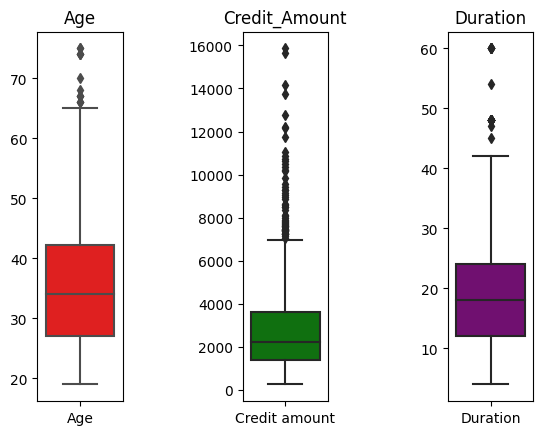

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64


<ipython-input-4-b850000f1f9a>:40: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-4-b850000f1f9a>:41: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-4-b850000f1f9a>:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-4-b850000f1f9a>:76: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



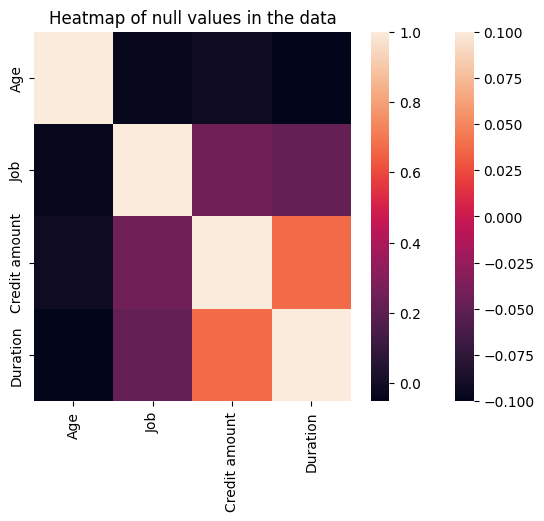

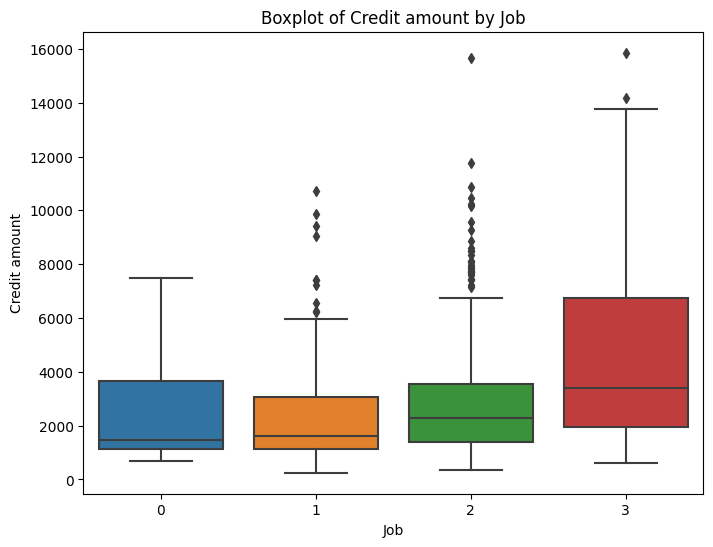

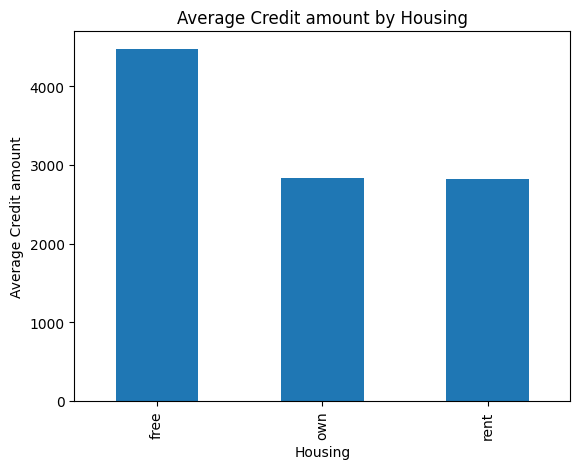

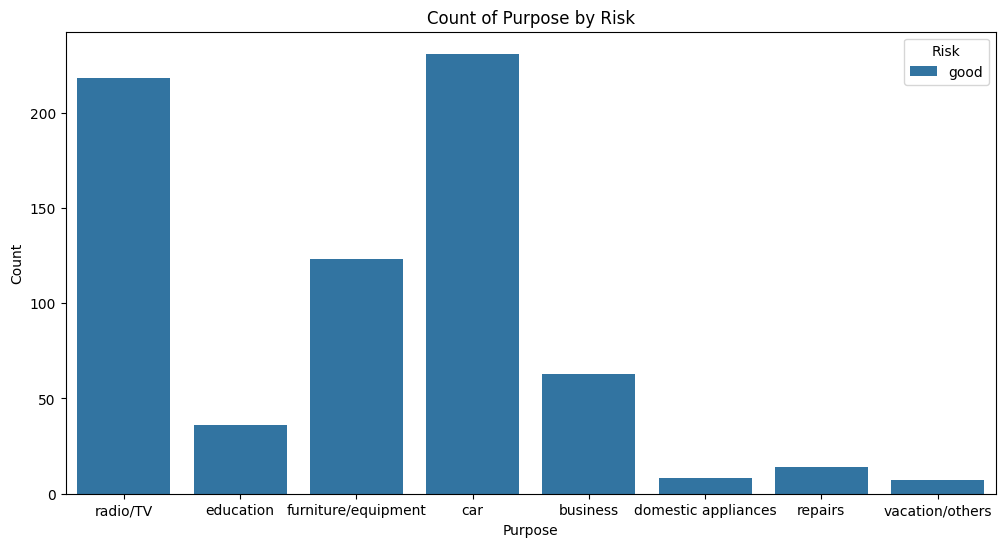

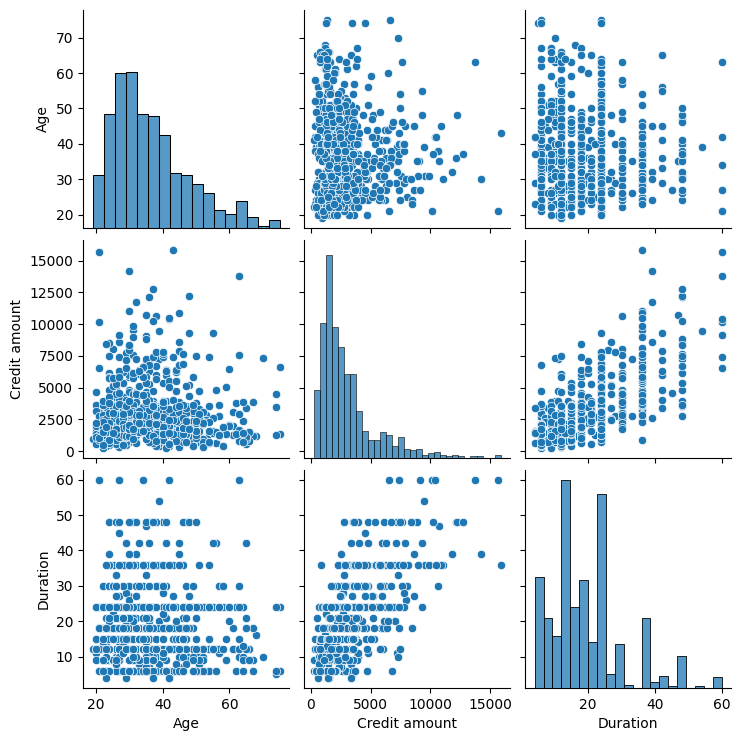

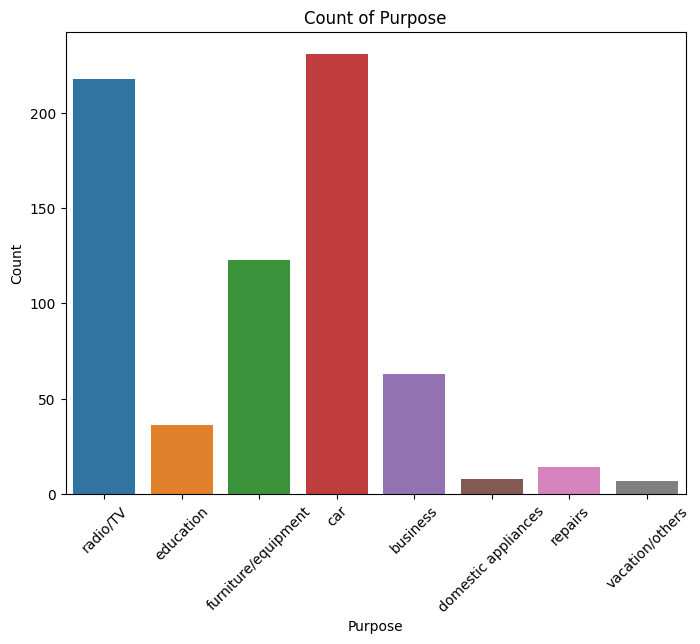

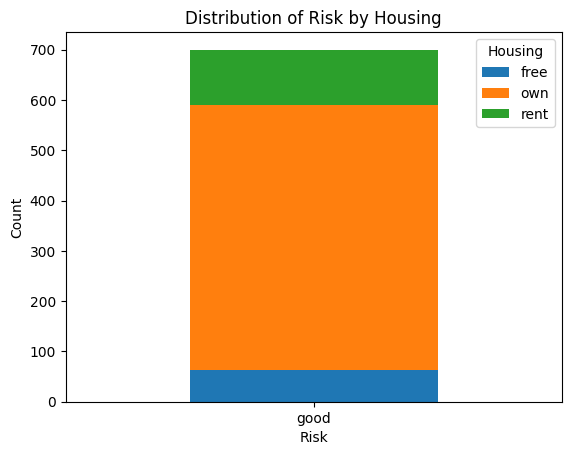

In [ ]:
df_good = data[data['Risk'] == 'good']
EDA(df_good)

******************** Phase 1 ********************
-------------------- Data information --------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 1 to 998
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               300 non-null    int64 
 1   Sex               300 non-null    object
 2   Job               300 non-null    int64 
 3   Housing           300 non-null    object
 4   Saving accounts   300 non-null    object
 5   Checking account  300 non-null    object
 6   Credit amount     300 non-null    int64 
 7   Duration          300 non-null    int64 
 8   Purpose           300 non-null    object
 9   Risk              300 non-null    object
dtypes: int64(4), object(6)
memory usage: 25.8+ KB


-------------------- Data Shape --------------------
Number of Rows:  300
Number of Columns:  10


-------------------- Null values in Data --------------------
Age                 

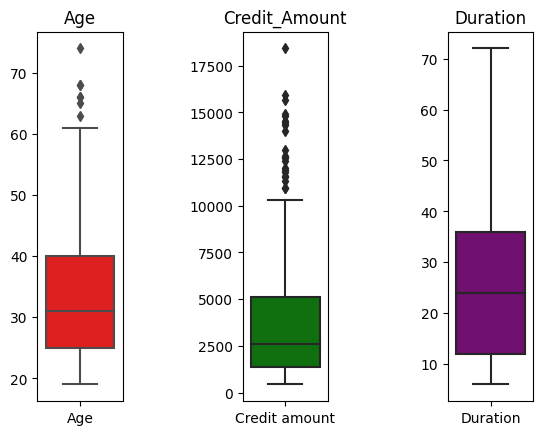

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64


<ipython-input-4-b850000f1f9a>:40: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-4-b850000f1f9a>:41: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-4-b850000f1f9a>:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-4-b850000f1f9a>:76: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



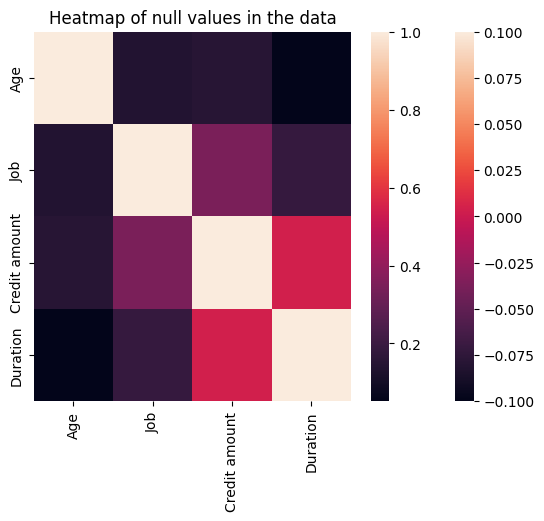

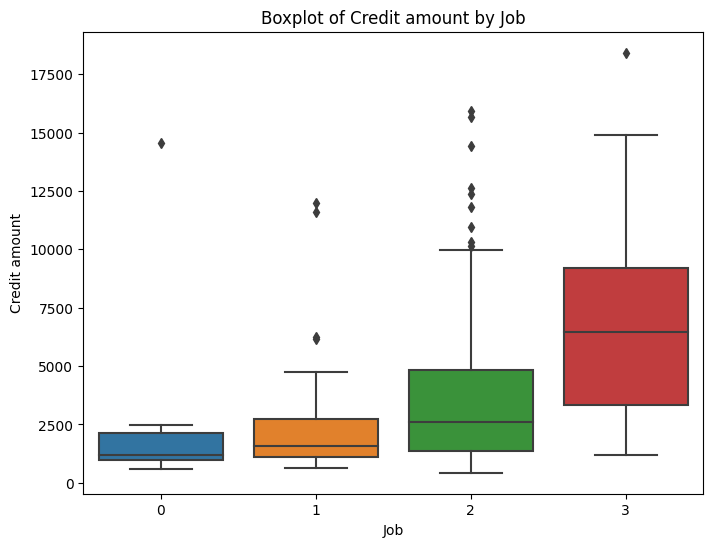

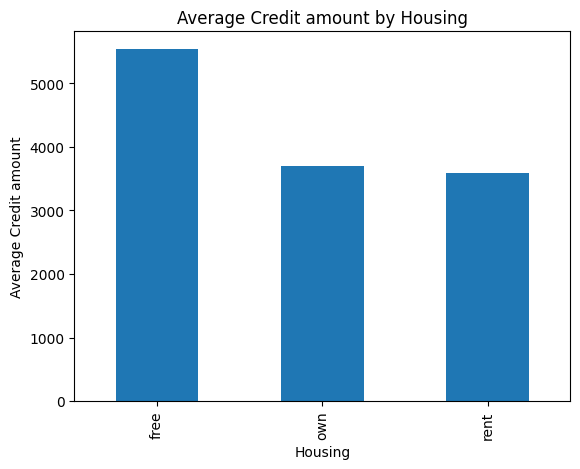

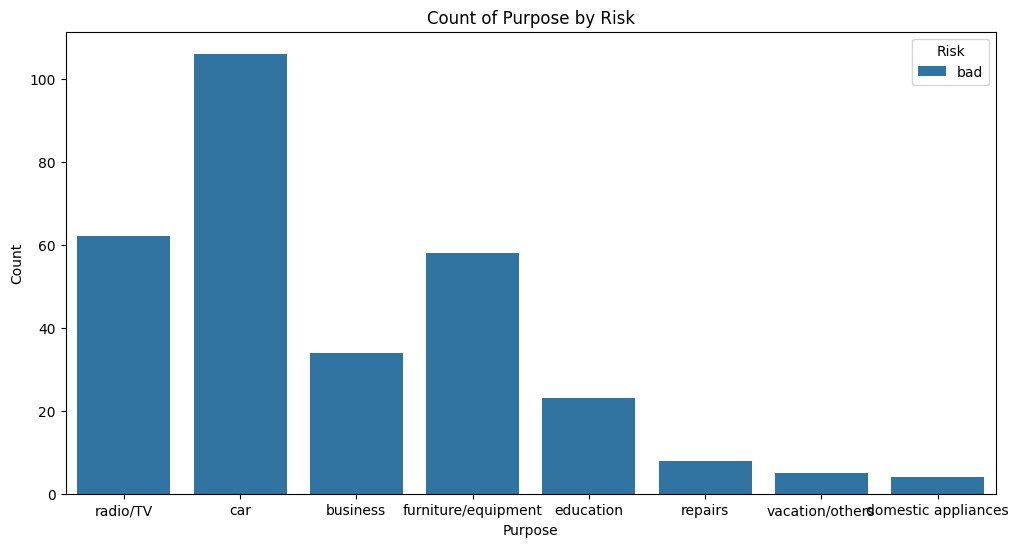

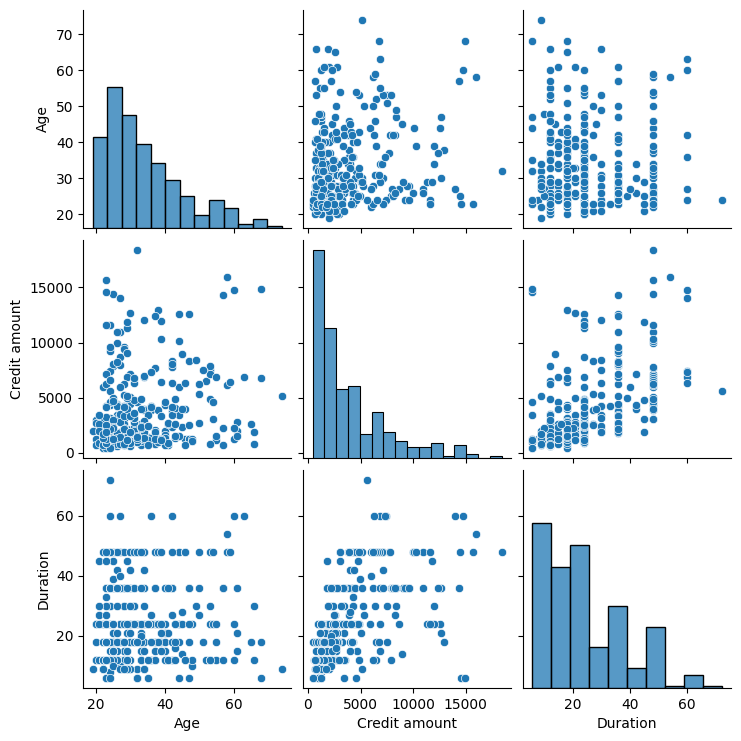

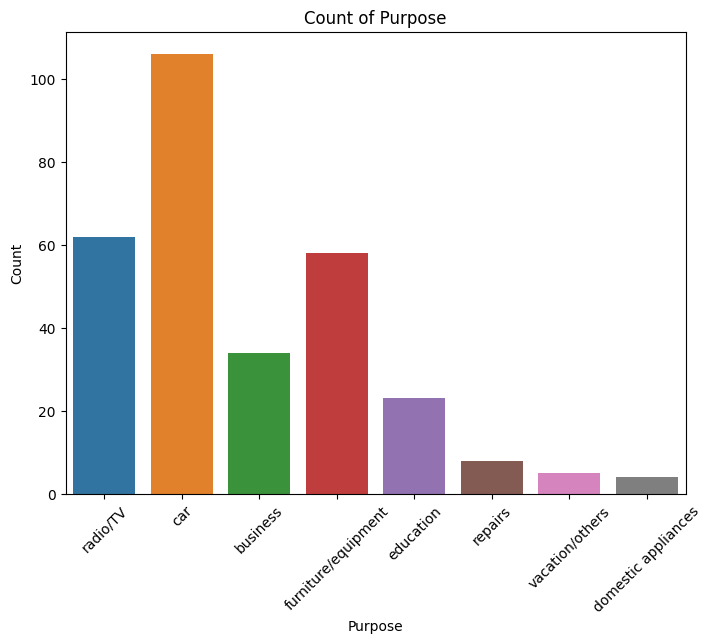

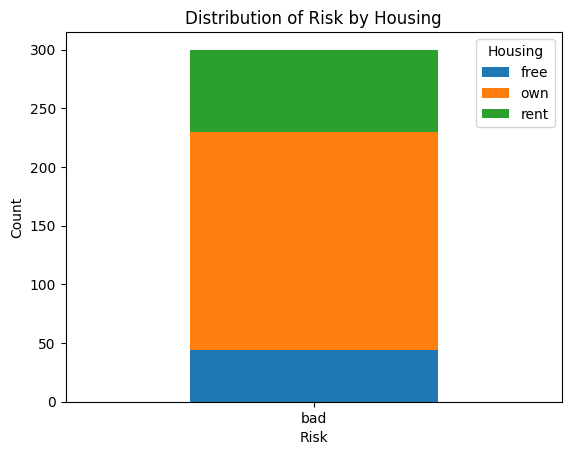

In [ ]:
df_bad = data[data['Risk'] == 'bad']
EDA(df_bad)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohc = OneHotEncoder(drop="first", sparse=False)
ohc_features = ["Sex", "Housing", "Saving accounts", "Checking account", "Purpose", "Risk"]
X_onehot = ohc.fit_transform(data[ohc_features])
df_onehot = pd.DataFrame(data=X_onehot, columns=ohc.get_feature_names_out(ohc.feature_names_in_))
df_onehot['Age'] = data['Age']
df_onehot['Job'] = data['Job']
df_onehot['Credit amount'] = data['Credit amount']
df_onehot['Duration'] = data['Duration']

!pip install lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

Y = df_onehot["Risk_good"]
X = df_onehot.drop("Risk_good", axis=1)

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 123)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [ ]:
clf = LazyClassifier(verbose = 0,ignore_warnings=True,custom_metric=None)
model,prediction = clf.fit(X_train,X_test,y_train,y_test)

100%|██████████| 29/29 [00:09<00:00,  3.09it/s]


In [ ]:
print(model)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.78               0.73     0.73      0.78   
LabelPropagation                   0.73               0.71     0.71      0.74   
LabelSpreading                     0.73               0.71     0.71      0.74   
SGDClassifier                      0.75               0.71     0.71      0.75   
QuadraticDiscriminantAnalysis      0.71               0.70     0.70      0.72   
ExtraTreesClassifier               0.73               0.69     0.69      0.74   
GaussianNB                         0.72               0.69     0.69      0.72   
NearestCentroid                    0.68               0.69     0.69      0.69   
XGBClassifier                      0.74               0.68     0.68      0.74   
BaggingClassifier                  0.71               0.68     0.68      0.71   
AdaBoostClassifier          

In [ ]:
Y.head() # 1 for Good , 0 for Bad

0   1.00
1   0.00
2   1.00
3   1.00
4   0.00
Name: Risk_good, dtype: float64

**Applying Machine Learning Models**

In [ ]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)

# Number of trees in random forest
n_estimators = [50,100,150,200]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [3,6,9]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
prediction = rf.predict(X_test)
rf.score(X_test,y_test)

0.745

In [ ]:
prediction

array([0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0.])

In [ ]:
proba_pred = rf.predict_proba(X)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(prediction, y_test))

              precision    recall  f1-score   support

         0.0       0.44      0.61      0.51        44
         1.0       0.88      0.78      0.83       156

    accuracy                           0.74       200
   macro avg       0.66      0.70      0.67       200
weighted avg       0.78      0.74      0.76       200



In [ ]:
p1 = rf.predict(X)
len(p1)

1000

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(df_onehot['Risk_good'], p1)

0.949

In [ ]:
pred = []
for i in range(1000):
  if p1[i] == 0:
    pred.append('bad')
  else:
    pred.append('good')

Probab = []
for i in range(len(proba_pred)):
  Probab.append(proba_pred[i][1])

data['Predicted'] = pred
data['Probability_Good'] = Probab
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Predicted,Probability_Good
0,67,male,2,own,unknown,little,1169,6,radio/TV,good,good,0.88
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,bad,0.13
2,49,male,1,own,little,unknown,2096,12,education,good,good,0.90
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,good,0.72
4,53,male,2,free,little,little,4870,24,car,bad,good,0.61


In [ ]:
def EDA1(data):
  print("*"*20,'Phase 1','*'*20)
  print('-'*20,'Data information'.center(5),'-'*20)
  data.info()
  print("\n")
  print('-'*20,'Data Shape'.center(5),'-'*20)
  print("Number of Rows: ",data.shape[0])
  print("Number of Columns: ",data.shape[1])
  print("\n")
  print('-'*20,'Null values in Data'.center(5),'-'*20)
  print(data.isnull().sum())
  print("\n")
  print('-'*20,'Summary of Data'.center(5),'-'*20)
  print(data.describe())
  print("\n")
  print('-'*20,'Unique Values in Data'.center(5),'-'*20)

  cols = []
  for i in data.columns:
      if data[i].dtype == 'object':
          cols.append(i)

  for c in cols:
    print("{} has {} unique values which are: {}".format(c,len(data[c].unique()),data[c].unique()))
    print('\n')

  print("*"*20,'Phase 2','*'*20)

  plt.subplot(1,5,1)
  sns.boxplot(data = pd.DataFrame(data['Age']),color='red').set_title('Age')
  plt.subplot(1,5,3)
  sns.boxplot(data = pd.DataFrame(data['Credit amount']),color='green').set_title('Credit_Amount')
  plt.subplot(1,5,5)
  sns.boxplot(data = pd.DataFrame(data['Duration']),color='purple').set_title('Duration')
  plt.show()

  s = sns.heatmap(data.isnull())
  s.set(xlabel='Columns', ylabel='Null Values', title = 'Heatmap of null values in the data')

  data.replace('NA', pd.NA, inplace=True)
  data['Saving accounts'].fillna('unknown', inplace=True)
  data['Checking account'].fillna('unknown', inplace=True)
  print(data.isnull().sum())

  bar_colors = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'pink', 'cyan']  # Add more colors as needed
  for c in cols:
      counts = data[c].value_counts()
      fig = go.Figure(data=go.Bar(
          x=counts.index,
          y=counts.values,
          marker=dict(color=bar_colors)
      ))
      fig.update_layout(
          title=f"Count Plot - {c}",
          xaxis_title="Categories",
          yaxis_title="Count",
          showlegend=False,
          template="plotly_white"
      )
      fig.show()
  counts = data['Job'].value_counts()
  fig = go.Figure(data=go.Bar(
          x=counts.index,
          y=counts.values,
          marker=dict(color=bar_colors)
  ))
  fig.update_layout(
          title=f"Count Plot - Jobs",
          xaxis_title="Categories",
          yaxis_title="Count",
          showlegend=False,
          template="plotly_white"
  )
  fig.show()

  correlation_matrix = data.corr()
  sns.heatmap(correlation_matrix)
  plt.show()

  for c in cols:
    counts = data[c].value_counts()

    fig = go.Figure(data=go.Pie(labels=counts.index, values=counts.values, hole=0.3))

    fig.update_layout(
        title=f'Distribution of {c}',
        template="plotly_white"
    )
    fig.show()

  plt.figure(figsize=(8, 6))
  sns.boxplot(data=data, x='Job', y='Credit amount')
  plt.xlabel('Job')
  plt.ylabel('Credit amount')
  plt.title('Boxplot of Credit amount by Job')
  plt.show()

  average_credit_by_housing = data.groupby('Housing')['Credit amount'].mean()
  average_credit_by_housing.plot(kind='bar')
  plt.xlabel('Housing')
  plt.ylabel('Average Credit amount')
  plt.title('Average Credit amount by Housing')
  plt.show()

  plt.figure(figsize=(12, 6))
  sns.countplot(data=data, x='Purpose', hue='Predicted')
  plt.xlabel('Purpose')
  plt.ylabel('Count')
  plt.title('Count of Purpose by Risk')
  plt.show()

  sns.pairplot(data=data, vars=['Age', 'Credit amount', 'Duration'])
  plt.show()

  plt.figure(figsize=(8, 6))
  sns.countplot(data=data, x='Purpose')
  plt.xlabel('Purpose')
  plt.ylabel('Count')
  plt.title('Count of Purpose')
  plt.xticks(rotation=45)
  plt.show()

  cross_table = pd.crosstab(data['Predicted'], data['Housing'])
  cross_table.plot(kind='bar', stacked=True)
  plt.xlabel('Risk')
  plt.ylabel('Count')
  plt.title('Distribution of Risk by Housing')
  plt.xticks(rotation=0)
  plt.show()

******************** Phase 1 ********************
-------------------- Data information --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1000 non-null   int64  
 1   Sex               1000 non-null   object 
 2   Job               1000 non-null   int64  
 3   Housing           1000 non-null   object 
 4   Saving accounts   1000 non-null   object 
 5   Checking account  1000 non-null   object 
 6   Credit amount     1000 non-null   int64  
 7   Duration          1000 non-null   int64  
 8   Purpose           1000 non-null   object 
 9   Risk              1000 non-null   object 
 10  Predicted         1000 non-null   object 
 11  Probability_Good  1000 non-null   float64
dtypes: float64(1), int64(4), object(7)
memory usage: 93.9+ KB


-------------------- Data Shape --------------------
Number of

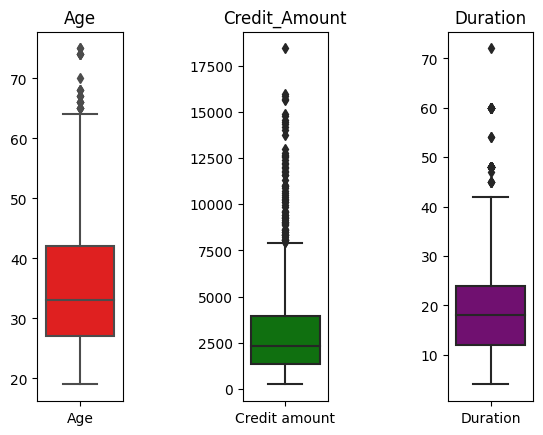

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
Predicted           0
Probability_Good    0
dtype: int64


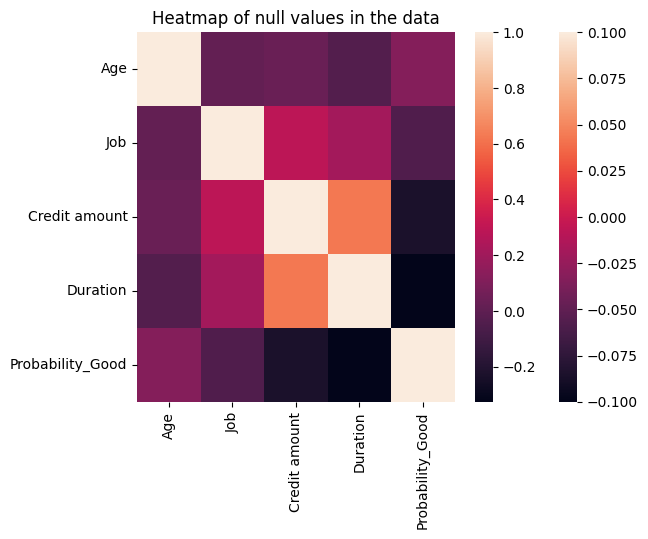

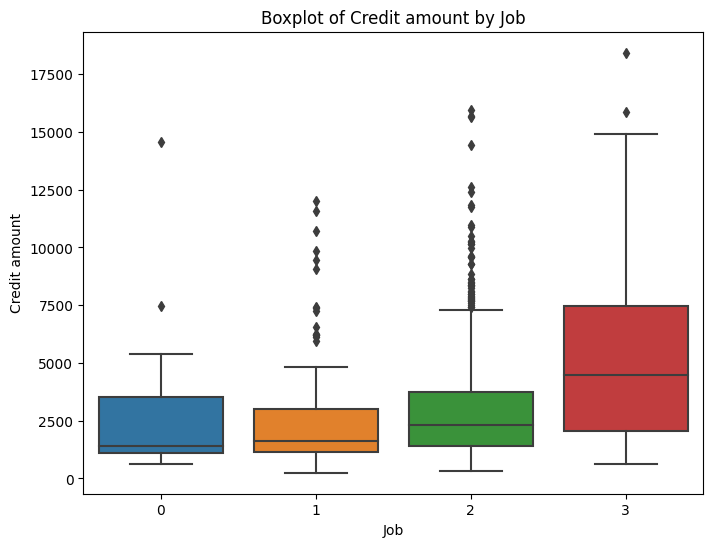

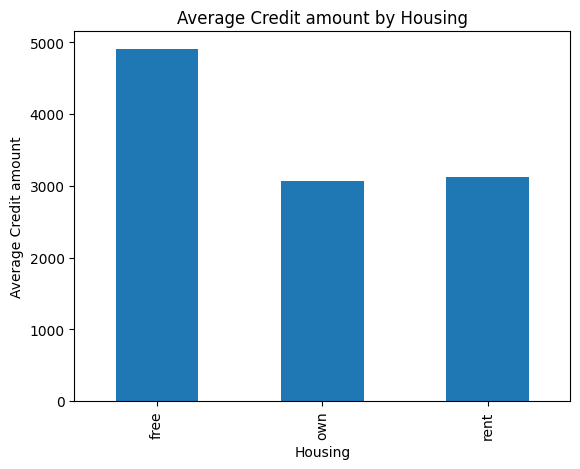

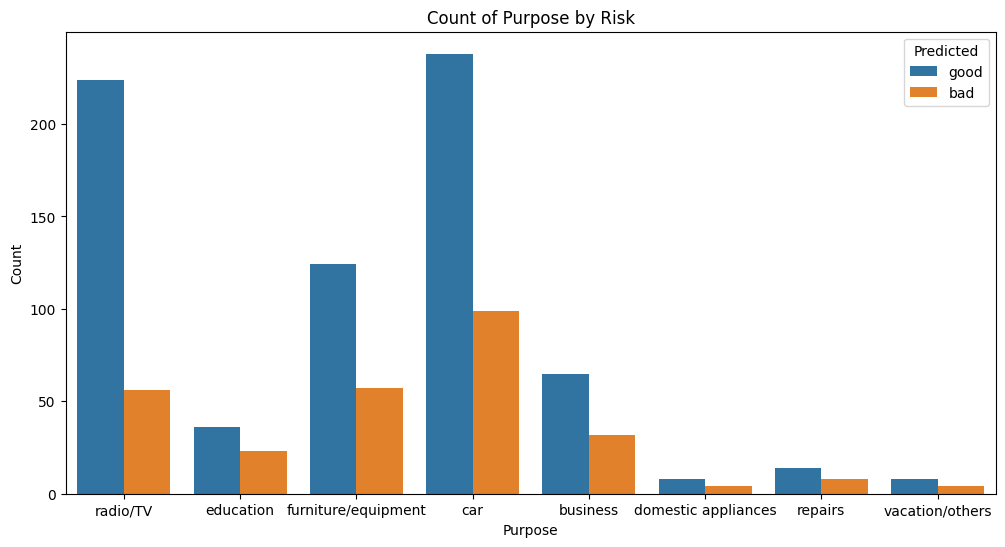

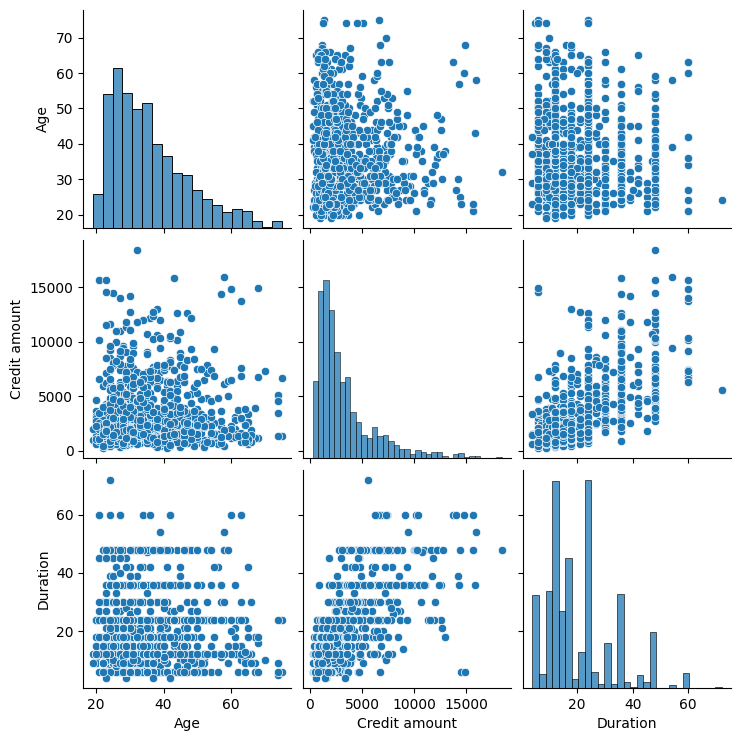

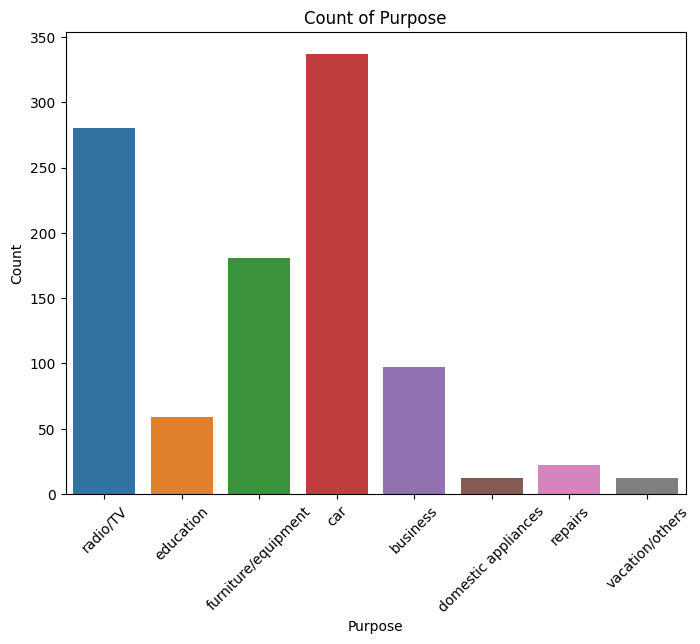

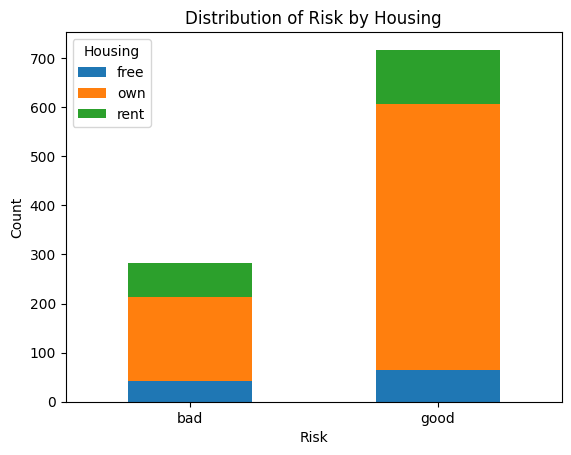

In [ ]:
EDA1(data)

In [ ]:
pred_good = data[data['Predicted']  == 'good']
pred_bad = data[data['Predicted']  == 'bad']

******************** Phase 1 ********************
-------------------- Data information --------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 717 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               717 non-null    int64  
 1   Sex               717 non-null    object 
 2   Job               717 non-null    int64  
 3   Housing           717 non-null    object 
 4   Saving accounts   717 non-null    object 
 5   Checking account  717 non-null    object 
 6   Credit amount     717 non-null    int64  
 7   Duration          717 non-null    int64  
 8   Purpose           717 non-null    object 
 9   Risk              717 non-null    object 
 10  Predicted         717 non-null    object 
 11  Probability_Good  717 non-null    float64
dtypes: float64(1), int64(4), object(7)
memory usage: 72.8+ KB


-------------------- Data Shape --------------------
Number of 

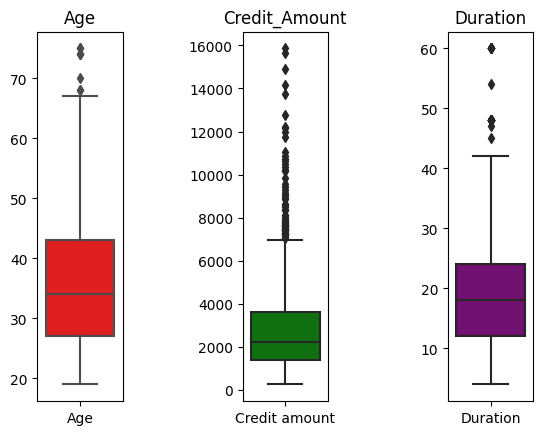

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
Predicted           0
Probability_Good    0
dtype: int64


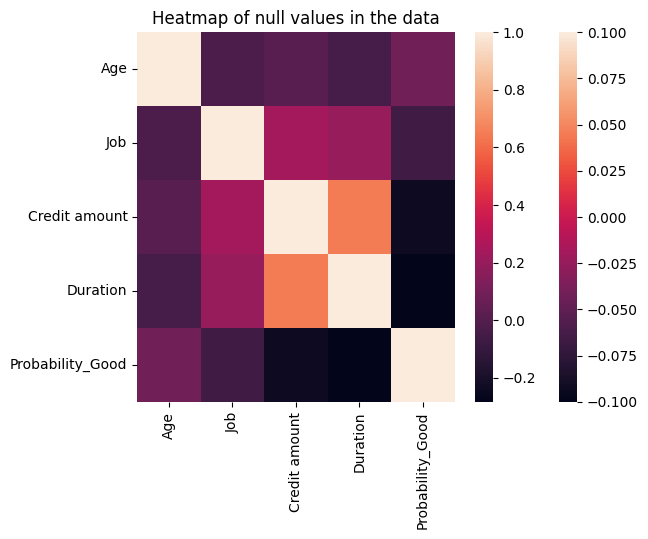

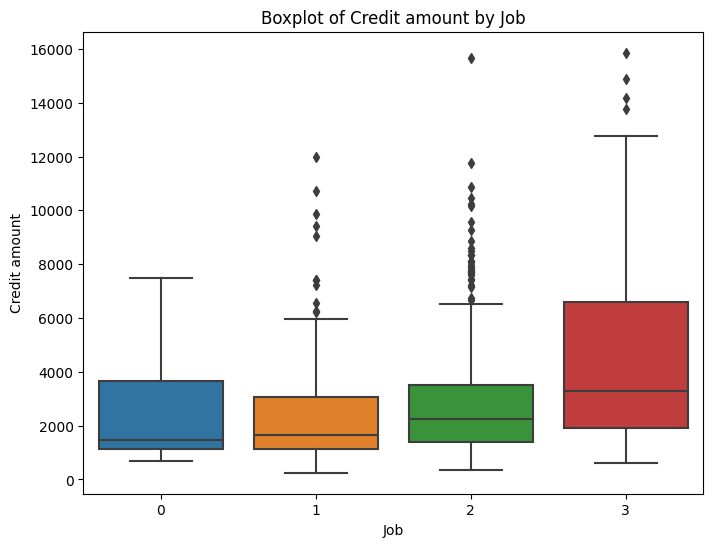

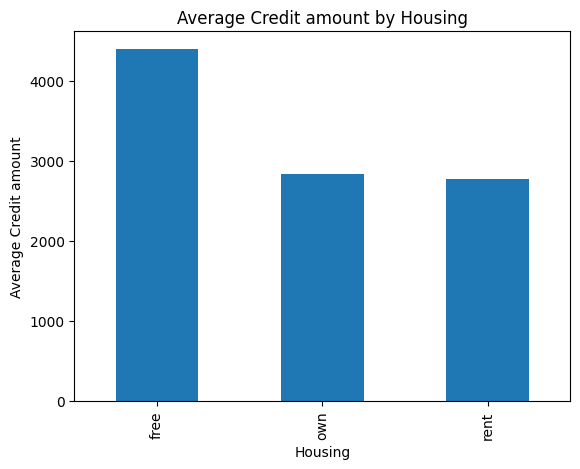

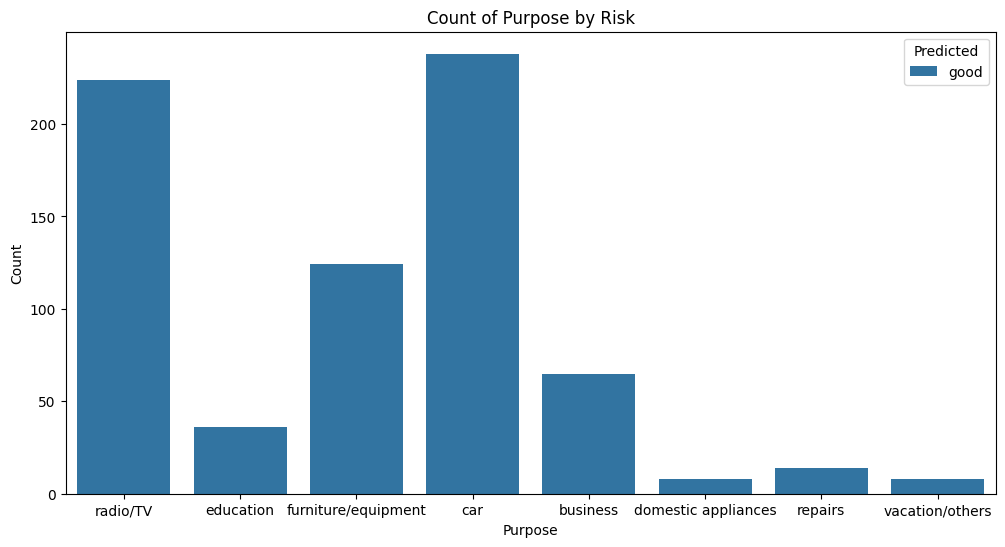

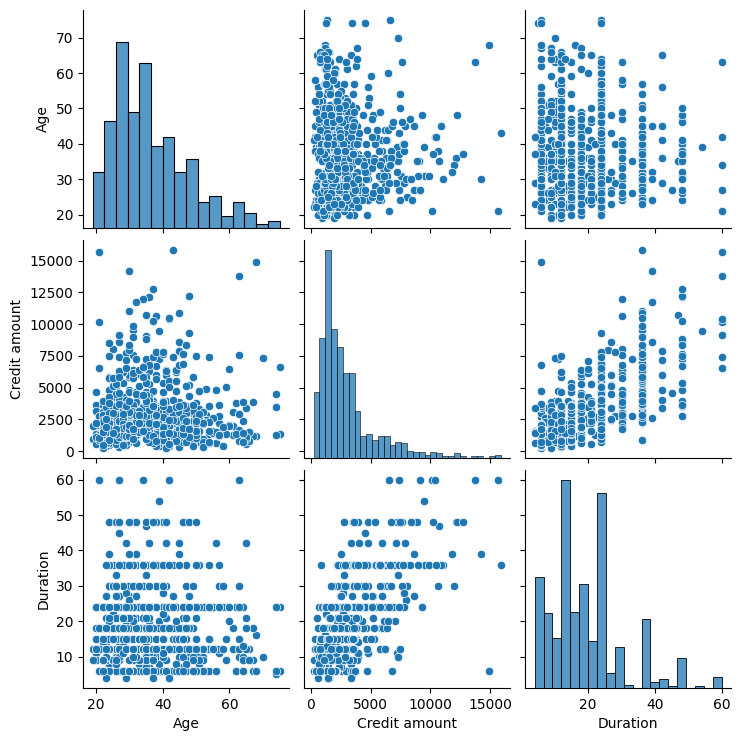

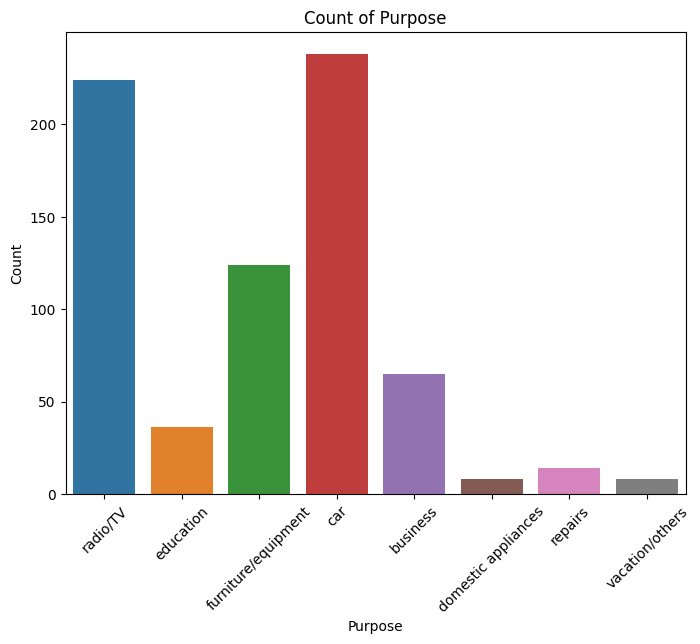

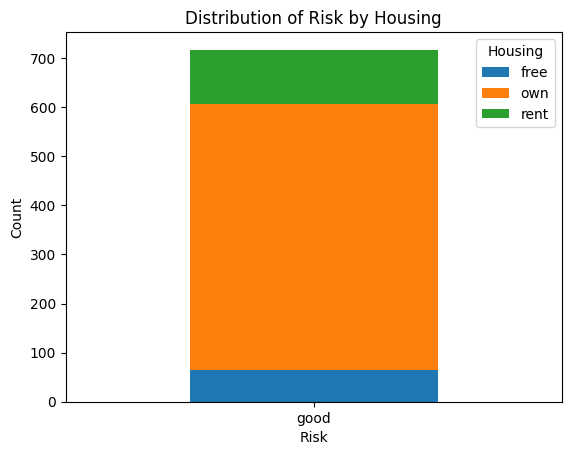

In [ ]:
EDA1(pred_good)

******************** Phase 1 ********************
-------------------- Data information --------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 283 entries, 1 to 998
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               283 non-null    int64  
 1   Sex               283 non-null    object 
 2   Job               283 non-null    int64  
 3   Housing           283 non-null    object 
 4   Saving accounts   283 non-null    object 
 5   Checking account  283 non-null    object 
 6   Credit amount     283 non-null    int64  
 7   Duration          283 non-null    int64  
 8   Purpose           283 non-null    object 
 9   Risk              283 non-null    object 
 10  Predicted         283 non-null    object 
 11  Probability_Good  283 non-null    float64
dtypes: float64(1), int64(4), object(7)
memory usage: 28.7+ KB


-------------------- Data Shape --------------------
Number of 

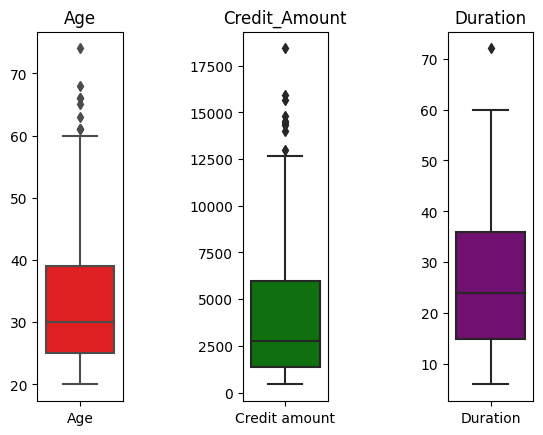

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
Predicted           0
Probability_Good    0
dtype: int64


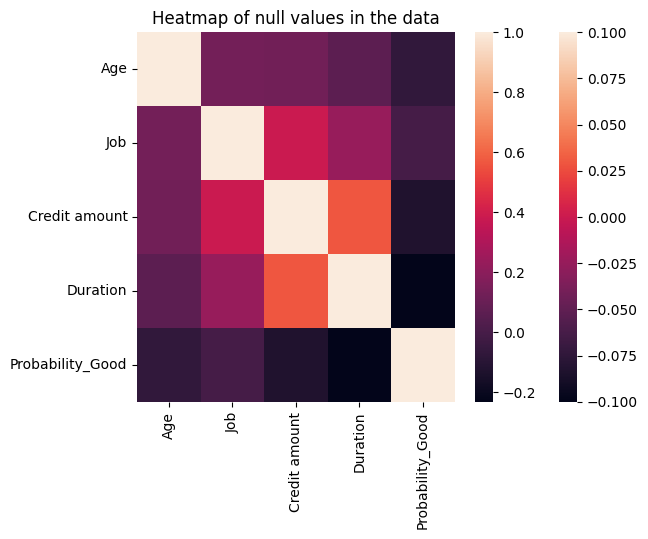

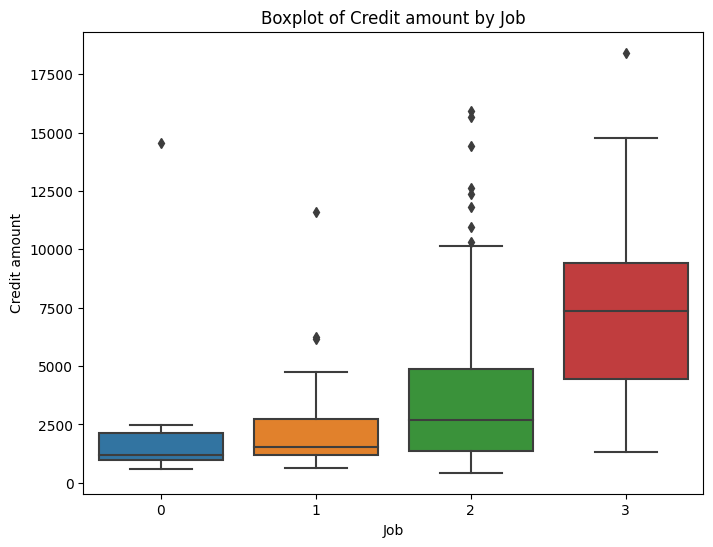

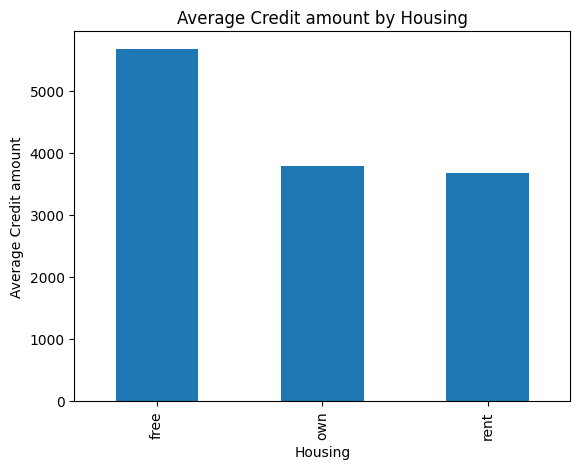

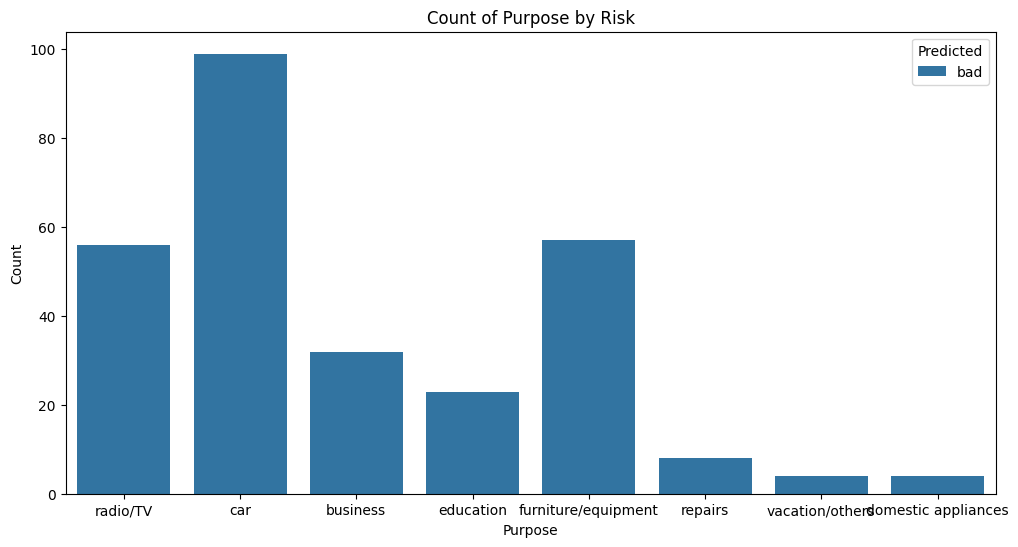

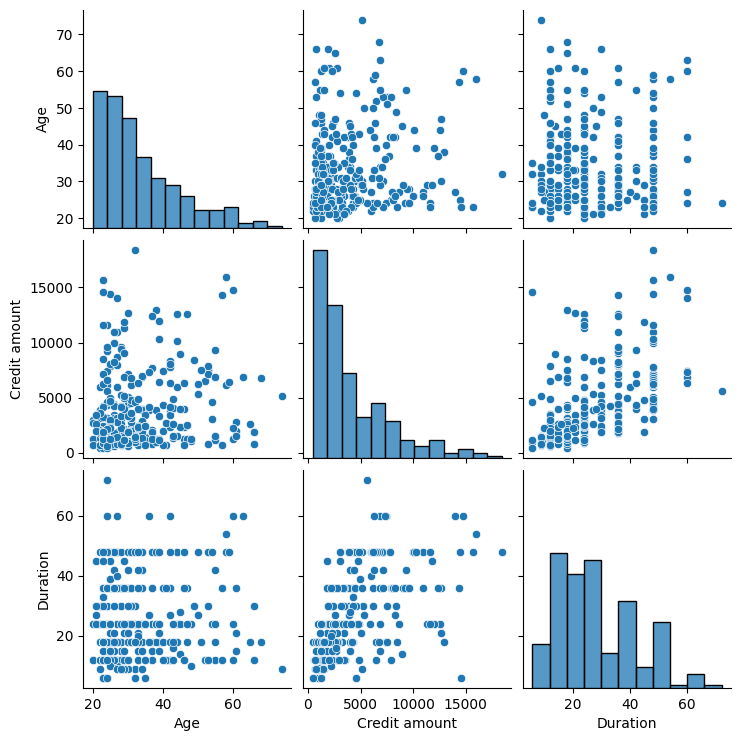

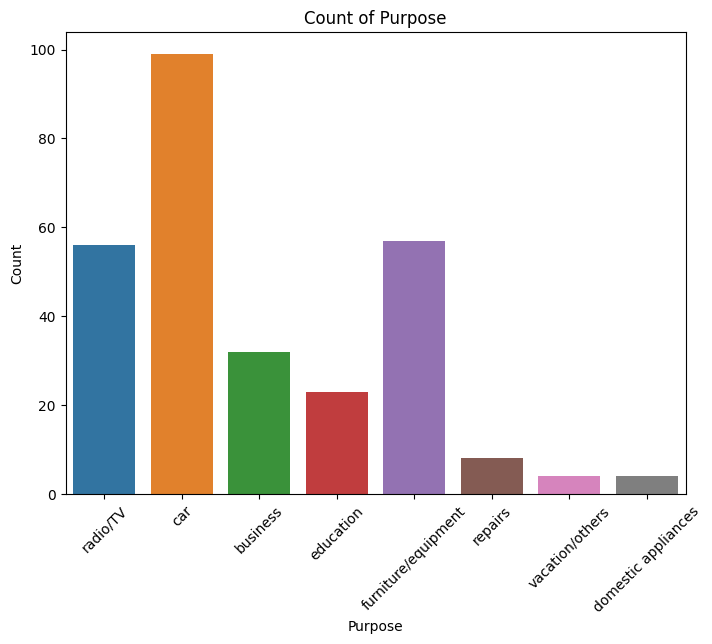

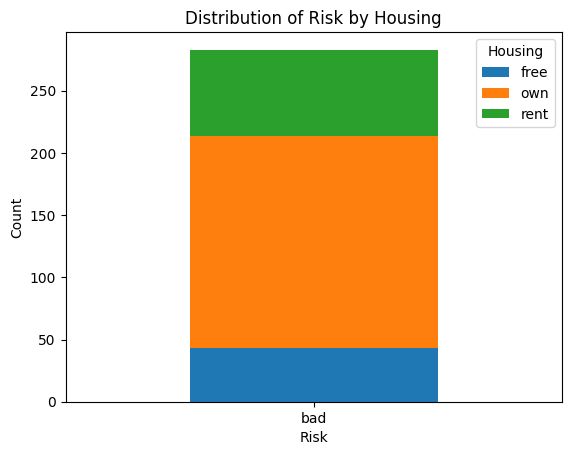

In [ ]:
EDA1(pred_bad)

In [ ]:
temp = data[data['Probability_Good'] <= 0.5]
temp.sort_values(by = 'Probability_Good',ascending = False).head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Predicted,Probability_Good
613,22,female,2,rent,little,little,3632,24,car,good,bad,0.49
722,24,female,1,own,little,little,1228,12,car,bad,bad,0.49
869,24,female,2,rent,little,little,652,12,furniture/equipment,good,bad,0.48
417,23,female,2,rent,unknown,little,8471,18,education,good,bad,0.48
328,31,male,2,own,little,rich,4473,36,radio/TV,good,bad,0.48


In [ ]:
temp.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Predicted,Probability_Good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,bad,0.13
9,28,male,3,own,little,moderate,5234,30,car,bad,bad,0.34
10,25,female,2,rent,little,moderate,1295,12,car,bad,bad,0.13
11,24,female,2,rent,little,little,4308,48,business,bad,bad,0.08
13,60,male,1,own,little,little,1199,24,car,bad,bad,0.22


<Axes: >

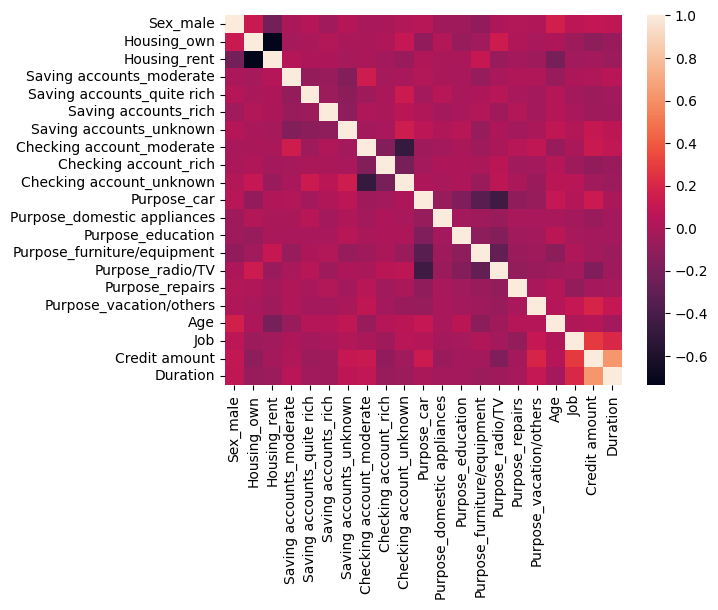

In [ ]:
df_new = df_onehot.drop('Risk_good',axis = 1)
df_new.head()
sns.heatmap(df_new.corr())

In [ ]:
rf.feature_importances_

array([0.03190666, 0.02554619, 0.01669918, 0.01857268, 0.01276784,
       0.01089785, 0.02927758, 0.02783949, 0.01495245, 0.08000432,
       0.02905556, 0.00384373, 0.01261266, 0.01965959, 0.02485563,
       0.00820629, 0.00389811, 0.18566618, 0.05744186, 0.22397633,
       0.16231983])

In [ ]:
X_train.head()

,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Saving accounts_unknown,Checking account_moderate,Checking account_rich,Checking account_unknown,...,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Age,Job,Credit amount,Duration
512,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,26,2,2687,15
685,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,34,2,6527,60
997,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,1.00,0.00,0.00,38,2,804,12
927,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,39,2,10297,48
376,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,1.00,0.00,0.00,34,2,2320,18


In [ ]:
temp = data[['Purpose','Predicted','Probability_Good']]
temp.head()

,Purpose,Predicted,Probability_Good
0,radio/TV,good,0.88
1,radio/TV,bad,0.13
2,education,good,0.90
3,furniture/equipment,good,0.72
4,car,good,0.61


In [ ]:
def OHC(data):

  from sklearn.preprocessing import OneHotEncoder

  ohc = OneHotEncoder(drop="first", sparse=False)
  ohc_features = ["Sex", "Housing", "Saving accounts", "Checking account", "Purpose"]
  X_onehot = ohc.fit_transform(data[ohc_features])
  df_onehot = pd.DataFrame(data=X_onehot, columns=ohc.get_feature_names_out(ohc.feature_names_in_))
  df_onehot['Age'] = data['Age']
  df_onehot['Job'] = data['Job']
  df_onehot['Credit amount'] = data['Credit amount']
  df_onehot['Duration'] = data['Duration']

  return df_onehot

In [ ]:
new_cust = original.sample(n=1)
new_df = pd.DataFrame(columns = ['Age','Sex','Job','Housing','Saving accounts','Checking account','Credit amount','Duration','Purpose','Risk'])
new_df = new_df.append(data,ignore_index = True)
for i in data.Purpose.unique():
  new_cust['Purpose'] = i
  new_df = new_df.append(new_cust,ignore_index = True)

new_df['Saving accounts'].fillna('unknown', inplace=True)
new_df['Checking account'].fillna('unknown', inplace=True)
new_df = new_df.drop('Risk',axis = 1)

In [ ]:
X_cust = new_df[-8:]
X_new = OHC(new_df)
X_new = X_new[-8:]
X_new
prnew = rf.predict_proba(X_new)
result = rf.predict(X_new)
pred = []
for i in range(len(X_new)):
  if result[i] == 0:
    pred.append('bad')
  else:
    pred.append('good')

Probab = []
for i in range(len(prnew)):
  Probab.append(prnew[i][1])

X_cust['Predicted'] = pred
X_cust['Probability_Good'] = Probab
X_cust

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Predicted,Probability_Good
1000,29,female,2,own,little,little,1893,12,radio/TV,good,0.78
1001,29,female,2,own,little,little,1893,12,education,good,0.52
1002,29,female,2,own,little,little,1893,12,furniture/equipment,good,0.81
1003,29,female,2,own,little,little,1893,12,car,good,0.80
1004,29,female,2,own,little,little,1893,12,business,good,0.79
1005,29,female,2,own,little,little,1893,12,domestic appliances,good,0.71
1006,29,female,2,own,little,little,1893,12,repairs,good,0.68
1007,29,female,2,own,little,little,1893,12,vacation/others,good,0.83
